In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [7]:
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

In [8]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


Text(0.5, 1.0, 'Distribution of Fraud')

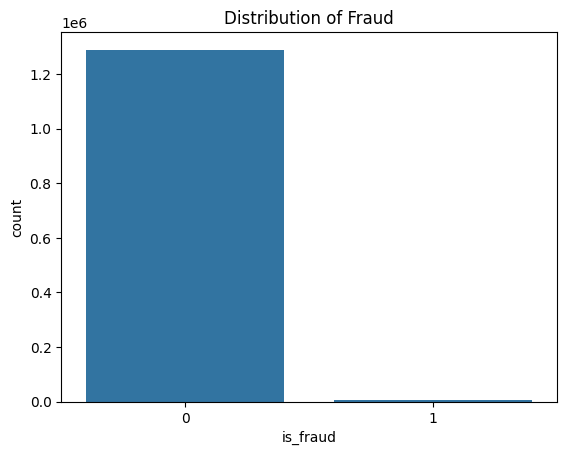

In [10]:
sns.countplot(x="is_fraud", data=df_train)
plt.title("Distribution of Fraud")

In [11]:
target = df_train['is_fraud']
test_target = df_test['is_fraud']

In [12]:
features = df_train.drop(columns=["trans_date_trans_time", "cc_num", "first", "last", "street", "city", "state", "zip", "job", "dob", "trans_num", "unix_time"], errors='ignore')

In [13]:
features = features.dropna()

In [14]:
features

,Unnamed: 0,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0
2,2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,36.841266,-111.690765,0
1296671,1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,38.906881,-78.246528,0
1296672,1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,33.619513,-105.130529,0
1296673,1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,42.788940,-103.241160,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [16]:
features = pd.get_dummies(features, drop_first=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Distribution of Fraud on test case')

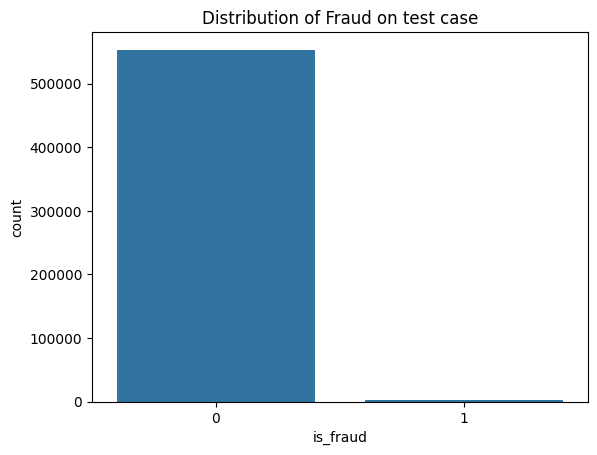

In [34]:
sns.countplot(x="is_fraud", data=df_test)
plt.title("Distribution of Fraud on test case")

In [18]:
target

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
X_train[0]

array([-8.49159313e-01, -4.03001537e-01, -1.55255482e+00, -1.02083970e-01,
       -2.90720609e-01, -1.43808150e+00, -8.74427137e-02, -7.61841239e-02,
       -3.71671289e-02, -3.70368583e-02, -3.82566217e-02, -2.70951229e-02,
       -3.67091704e-02, -3.83701789e-02, -4.43242207e-02, -3.84708389e-02,
       -2.53463841e-02, -3.85837694e-02, -3.77093785e-02, -4.35755753e-02,
       -3.81300526e-02, -3.63386710e-02, -4.34198524e-02, -3.63386710e-02,
       -4.17731384e-02, -2.47685835e-02, -3.77093785e-02, -4.35422526e-02,
       -3.43846069e-02, -4.22108582e-02, -3.76195433e-02, -4.55093988e-02,
       -4.37086138e-02, -4.17847156e-02, -3.88957549e-02, -3.86088204e-02,
       -4.39734925e-02, -3.79394120e-02, -3.87088635e-02, -4.27913372e-02,
       -4.21420447e-02, -3.75294943e-02, -3.80793079e-02, -3.19221815e-02,
       -2.53463841e-02, -4.10961153e-02, -4.18656676e-02, -3.82186947e-02,
       -4.38743489e-02, -4.24850057e-02, -4.58695814e-02, -3.72839854e-02,
       -4.20731194e-02, -

In [21]:
lr_model = LogisticRegression(random_state=42)


In [22]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
lr_predictions = lr_model.predict(X_test)

In [24]:
lr_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [26]:
lr_accuracy

1.0

In [27]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, predictions))
    print("-------------")

    with open(filename, "wb") as file:
        pickle.dump(model, file)

    print(f"Model saved as {filename}")
     

In [28]:

xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

XGBClassifier Accuracy: 0.9941


c:\Users\hewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

-------------
Model saved as xgb_model.pkl


c:\Users\hewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [30]:
feature_importances

array([6.6063452e-09, 1.3327350e-04, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9986666e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [31]:
feature_names

Index(['Unnamed: 0', 'amt', 'lat', 'long', 'city_pop', 'merch_lat',
       'merch_long', 'is_fraud', 'merchant_fraud_Abbott-Steuber',
       'merchant_fraud_Abernathy and Sons',
       ...
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object', length=714)

In [32]:
import pandas as pd
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

In [33]:
feature_importances_df

,feature,importance
0,Unnamed: 0,6.606345e-09
1,amt,1.332735e-04
2,lat,0.000000e+00
3,long,0.000000e+00
4,city_pop,0.000000e+00
...,...,...
709,category_personal_care,0.000000e+00
710,category_shopping_net,0.000000e+00
711,category_shopping_pos,0.000000e+00
712,category_travel,0.000000e+00


In [34]:
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)


In [35]:
feature_importances_df

,feature,importance
7,is_fraud,9.998667e-01
1,amt,1.332735e-04
0,Unnamed: 0,6.606345e-09
711,category_shopping_pos,0.000000e+00
446,"merchant_fraud_Morissette, Weber and Wiegand",0.000000e+00
...,...,...
240,"merchant_fraud_Hartmann, Rowe and Hermann",0.000000e+00
241,"merchant_fraud_Hauck, Dietrich and Funk",0.000000e+00
242,"merchant_fraud_Hayes, Marquardt and Dibbert",0.000000e+00
243,merchant_fraud_Heaney-Marquardt,0.000000e+00


In [36]:
top_20_features = feature_importances_df.sort_values(by='importance', ascending=False).head(20)
top_20_features

,feature,importance
7,is_fraud,9.998667e-01
1,amt,1.332735e-04
0,Unnamed: 0,6.606345e-09
20,merchant_fraud_Auer-West,0.000000e+00
23,"merchant_fraud_Bahringer, Osinski and Block",0.000000e+00
22,"merchant_fraud_Bahringer, Bergnaum and Quitzon",0.000000e+00
11,"merchant_fraud_Adams, Kovacek and Kuhlman",0.000000e+00
2,lat,0.000000e+00
3,long,0.000000e+00
4,city_pop,0.000000e+00


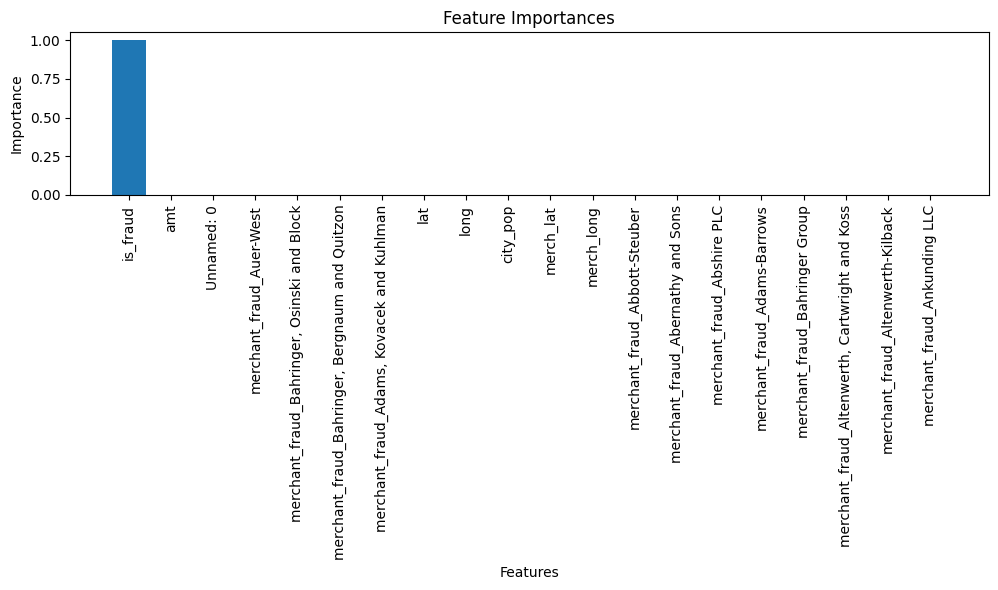

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(top_20_features['feature'],
        top_20_features['importance'])
plt.xticks(rotation=90),
plt.xlabel('Features'),
plt.ylabel('Importance'),
plt.title('Feature Importances'),
plt.tight_layout(),
plt.show()

In [38]:
features

,Unnamed: 0,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,0,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4,41.96,38.4207,-79.4629,99,38.674999,-78.632459,0,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,15.56,37.7175,-112.4777,258,36.841266,-111.690765,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1296671,1296671,51.70,39.2667,-77.5101,100,38.906881,-78.246528,0,False,True,...,False,False,False,False,False,False,False,False,False,True
1296672,1296672,105.93,32.9396,-105.8189,899,33.619513,-105.130529,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1296673,1296673,74.90,43.3526,-102.5411,1126,42.788940,-103.241160,0,False,False,...,False,False,False,False,False,False,False,False,False,True


In [39]:
features = pd.get_dummies(features, drop_first=True)


In [40]:
features

,Unnamed: 0,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,0,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4,41.96,38.4207,-79.4629,99,38.674999,-78.632459,0,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,15.56,37.7175,-112.4777,258,36.841266,-111.690765,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1296671,1296671,51.70,39.2667,-77.5101,100,38.906881,-78.246528,0,False,True,...,False,False,False,False,False,False,False,False,False,True
1296672,1296672,105.93,32.9396,-105.8189,899,33.619513,-105.130529,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1296673,1296673,74.90,43.3526,-102.5411,1126,42.788940,-103.241160,0,False,False,...,False,False,False,False,False,False,False,False,False,True


In [41]:
xgboost_model = xgb.XGBClassifier(random_state=42)

evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgboost-featureengineered")

XGBClassifier Accuracy: 0.9941


c:\Users\hewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

-------------
Model saved as xgboost-featureengineered


c:\Users\hewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hewan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
